# Mask R-CNN - Inspect Training Data

Inspect and visualize data loading and pre-processing code.

In [1]:
import os
import sys
import itertools
import math
import logging
import json
import re
import random
from collections import OrderedDict
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.patches import Polygon

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

%matplotlib inline

Using TensorFlow backend.


## Configurations

Run one of the code blocks below to import and load the configurations to use.

In [2]:
# Run one of the code blocks

# Shapes toy dataset
# import shapes
# config = shapes.ShapesConfig()

# MS COCO Dataset
import yellow
config = yellow.XHTConfig()
XHT_DIR = "/home/tdteach/data/yellowset/release/"  # TODO: enter value here

## Dataset

In [3]:
# Load validation dataset
fn_list = os.listdir(XHT_DIR)
vl_list = []
for fn in fn_list:
    if 'val' in fn:
        vl_list.append(os.path.join(XHT_DIR,fn))
print(vl_list)
dataset = yellow.XHTDataset()
dataset.load_xht(vl_list, "val")
dataset.prepare()

print("Image Count: {}".format(len(dataset.image_ids)))
print("Class Count: {}".format(dataset.num_classes))

['/home/tdteach/data/yellowset/release/valid.bin.0']
Image Count: 820
Class Count: 2


## Display Samples

Load and display images and masks.

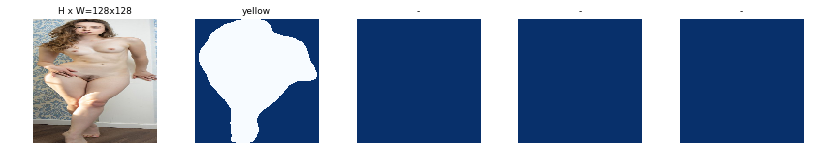

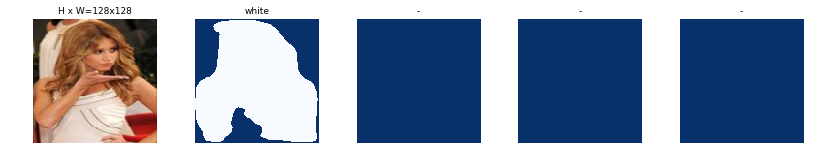

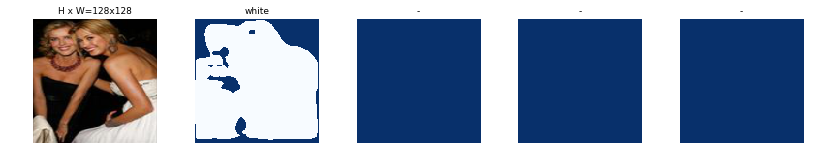

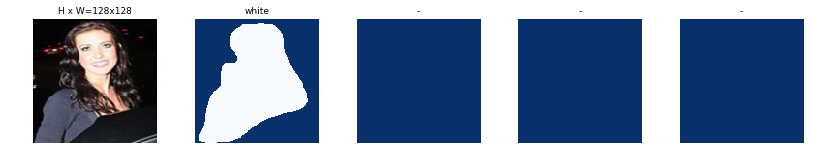

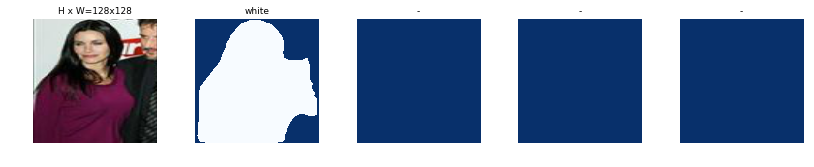

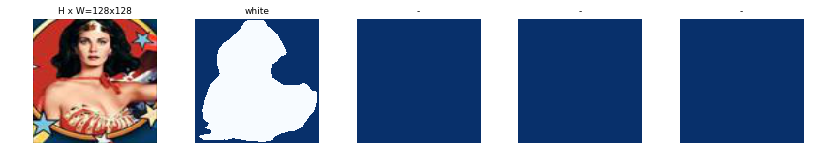

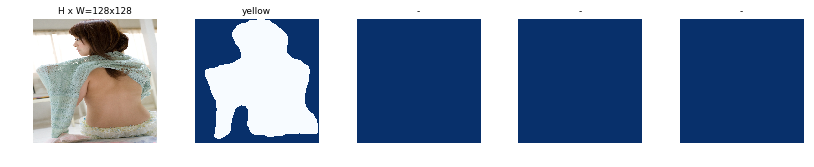

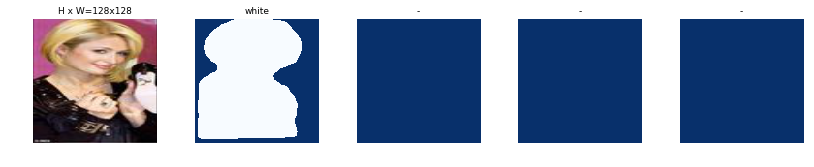

In [6]:
# Load and display random samples
image_ids = np.random.choice(dataset.image_ids, 8)
for image_id in image_ids:
    image, c_id = dataset.load_image(image_id)
    img, mask = yellow.unmold_image(image)
    class_ids = np.asarray([c_id],dtype=np.int32)
    visualize.display_top_masks(img, mask, class_ids, ['white','yellow'])